In [17]:
df <- read.csv("Data Files/Linear Regression Dataset/House_Price.csv", header=TRUE)

head(df)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.04934731
2,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.04614563
3,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.04576397
4,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.04715060
5,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.03947400
6,28.7,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.04590965


In [12]:
str(df)

'data.frame':	506 obs. of  19 variables:
 $ price      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ crime_rate : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ resid_area : num  32.3 37.1 37.1 32.2 32.2 ...
 $ air_qual   : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ room_num   : num  6.58 6.42 7.18 7 7.15 ...
 $ age        : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dist1      : num  4.35 4.99 5.03 6.21 6.16 6.22 5.87 6.04 6.18 6.67 ...
 $ dist2      : num  3.81 4.7 4.86 5.93 5.86 5.8 5.47 5.85 5.85 6.55 ...
 $ dist3      : num  4.18 5.12 5.01 6.16 6.37 6.23 5.7 6.25 6.3 6.85 ...
 $ dist4      : num  4.01 5.06 4.97 5.96 5.86 5.99 5.2 5.66 6 6.29 ...
 $ teachers   : num  24.7 22.2 22.2 21.3 21.3 21.3 24.8 24.8 24.8 24.8 ...
 $ poor_prop  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ airport    : chr  "YES" "NO" "NO" "YES" ...
 $ n_hos_beds : num  5.48 7.33 7.39 9.27 8.82 ...
 $ n_hot_rooms: num  11.2 12.2 101.1 11.3 11.3 ...


In [15]:
summary(df)

     price         crime_rate         resid_area       air_qual     
 Min.   : 5.00   Min.   : 0.00632   Min.   :30.46   Min.   :0.3850  
 1st Qu.:17.02   1st Qu.: 0.08205   1st Qu.:35.19   1st Qu.:0.4490  
 Median :21.20   Median : 0.25651   Median :39.69   Median :0.5380  
 Mean   :22.53   Mean   : 3.61352   Mean   :41.14   Mean   :0.5547  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.:48.10   3rd Qu.:0.6240  
 Max.   :50.00   Max.   :88.97620   Max.   :57.74   Max.   :0.8710  
                                                                    
    room_num          age             dist1            dist2       
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 0.920  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.270   1st Qu.: 1.940  
 Median :6.208   Median : 77.50   Median : 3.385   Median : 3.010  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.972   Mean   : 3.629  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.367   3rd Qu.: 4.992  
 Max.   :8.780   Max.   :100.00   Max.  

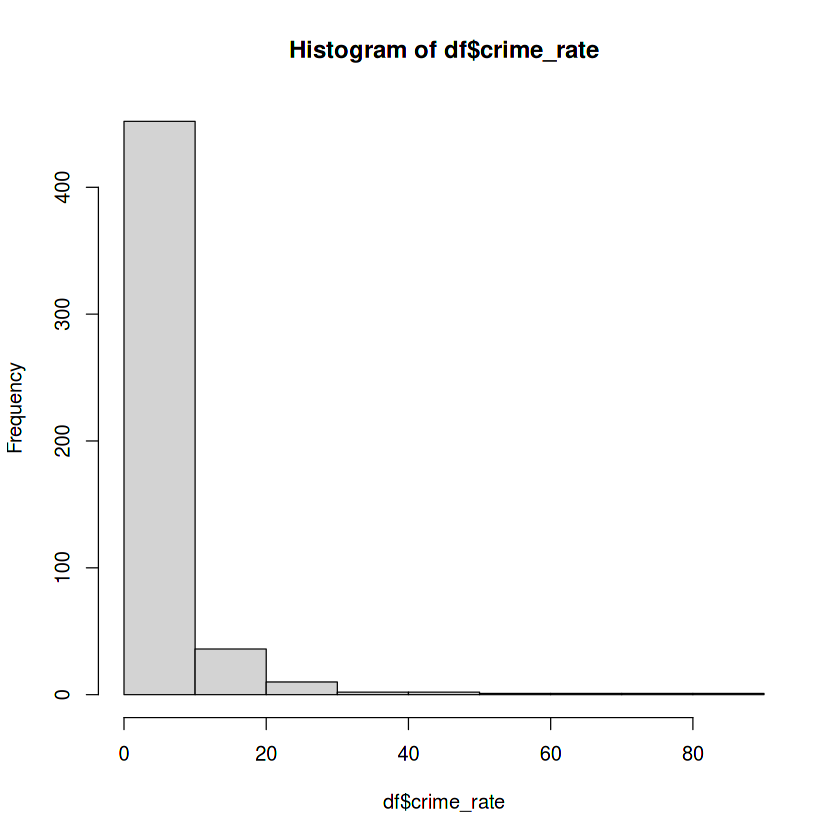

In [18]:
hist(df$crime_rate)

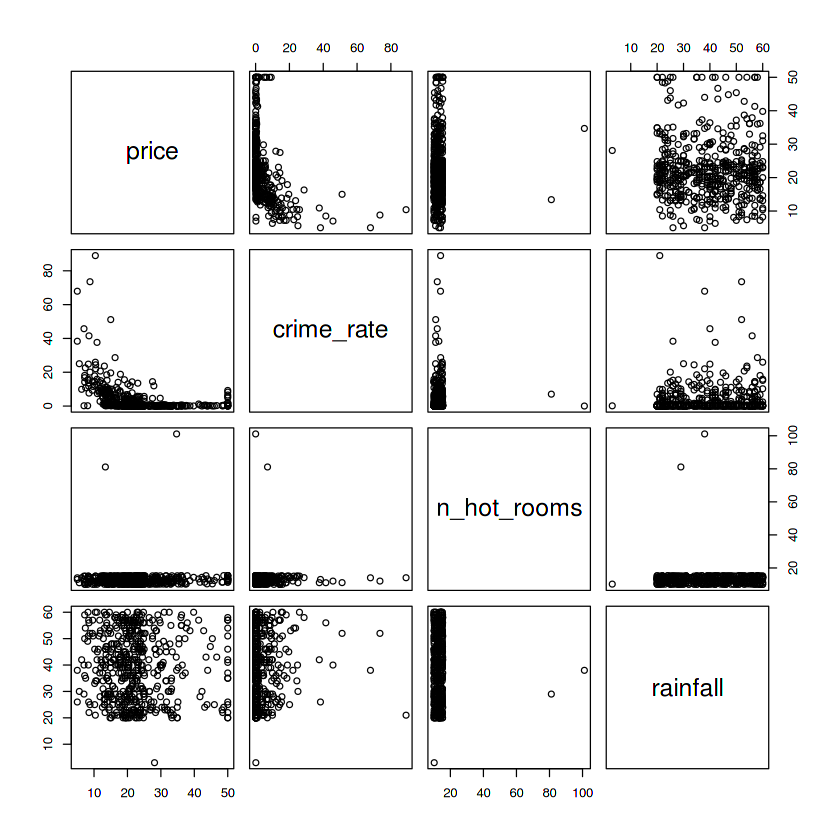

In [20]:
pairs(~price+crime_rate+n_hot_rooms+rainfall, data=df)

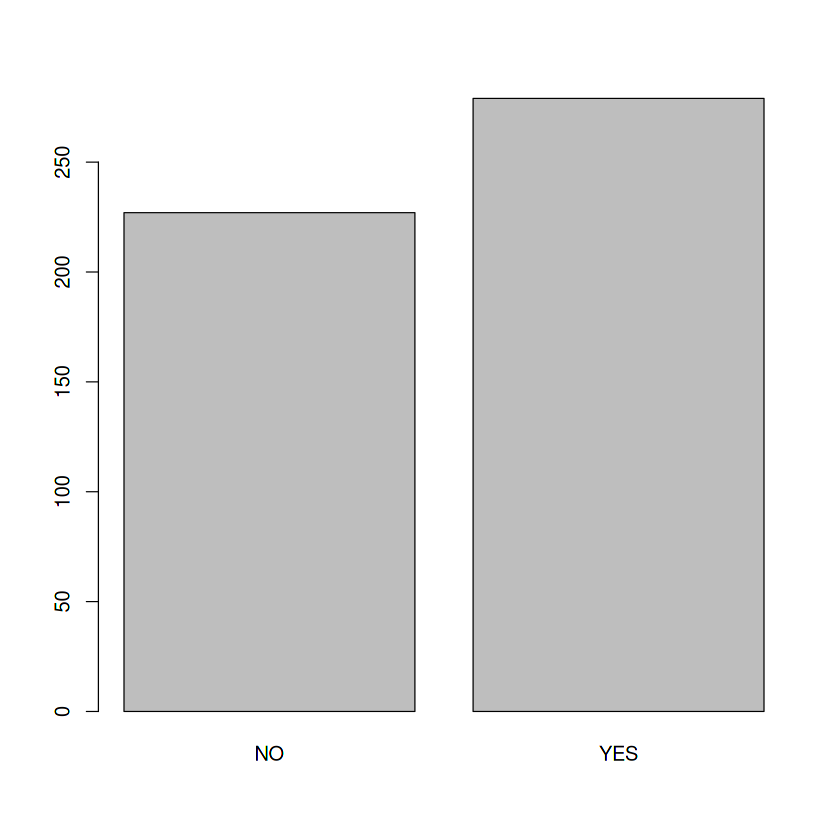

In [21]:
barplot(table(df$airport))

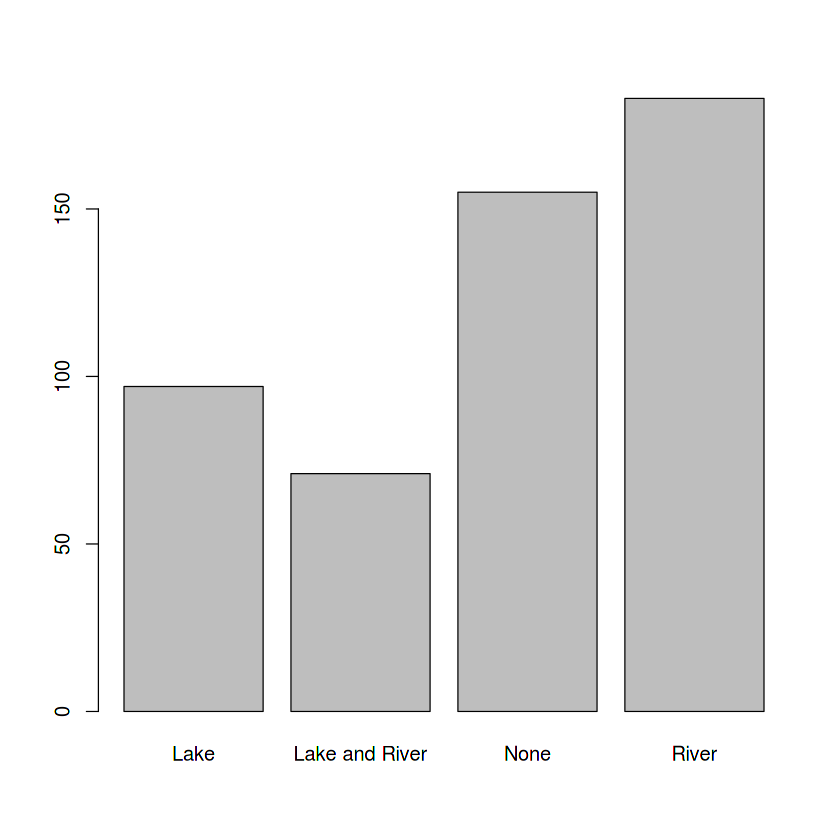

In [22]:
barplot(table(df$waterbody))

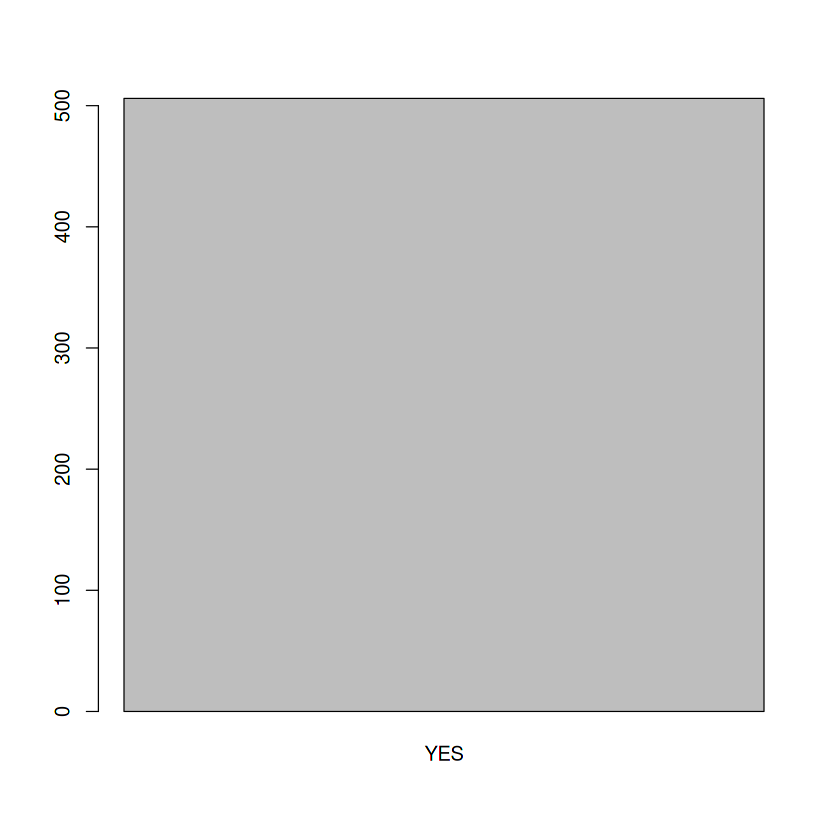

In [23]:
barplot(table(df$bus_ter))

# Conclusion
1. crime_rate has functional relationship with price.
2. n_hot_room and rainfall has outliers.
3. n_hos_beds have some missing values.
4. bus_ter is available for all, so it can't be used in predictions.

# Outlier Treatment

In [27]:
ul <- quantile(df$n_hot_rooms, 0.99) * 3

In [28]:
df$n_hot_rooms[df$n_hot_rooms > ul] <- ul
summary(df$n_hot_rooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.06   11.19   12.72   12.86   14.17   46.20 

In [29]:
ll <- quantile(df$rainfall, 0.01) * 0.3
df$rainfall[df$rainfall < ll] <- ll

In [30]:
summary(df$rainfall)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   28.00   39.00   39.19   50.00   60.00 

# Treating Missing Values

In [40]:
df$n_hos_beds[is.na(df$n_hos_beds)] <- mean(df$n_hos_beds, na.rm=TRUE)
summary(df$n_hos_beds)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.268   6.659   7.963   7.900   9.076  10.876 

# Variable Transformation 

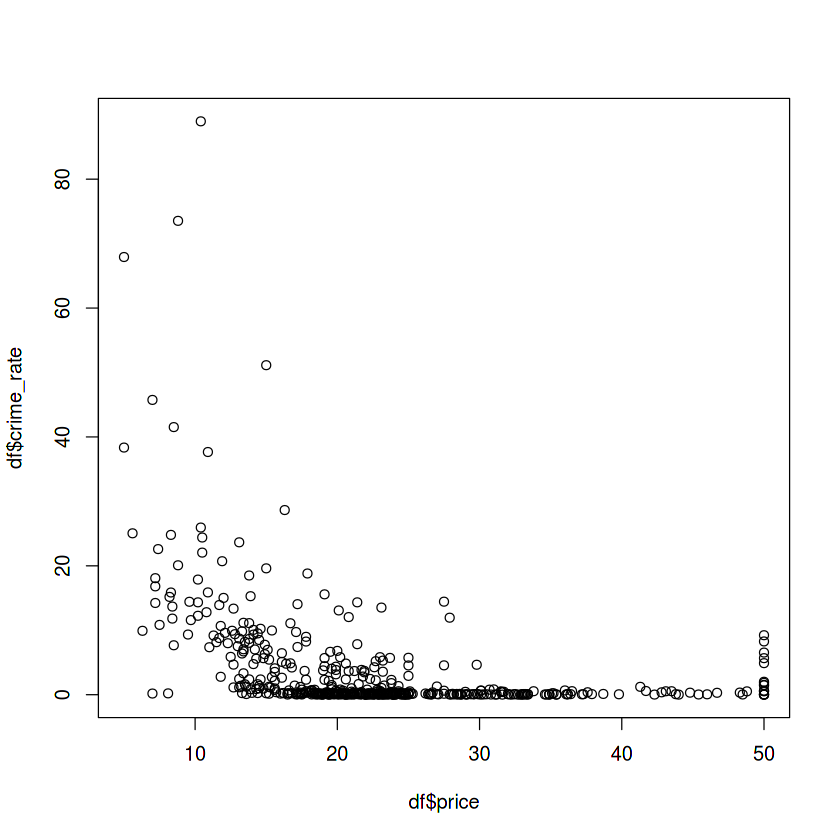

In [42]:
plot(df$price, df$crime_rate)

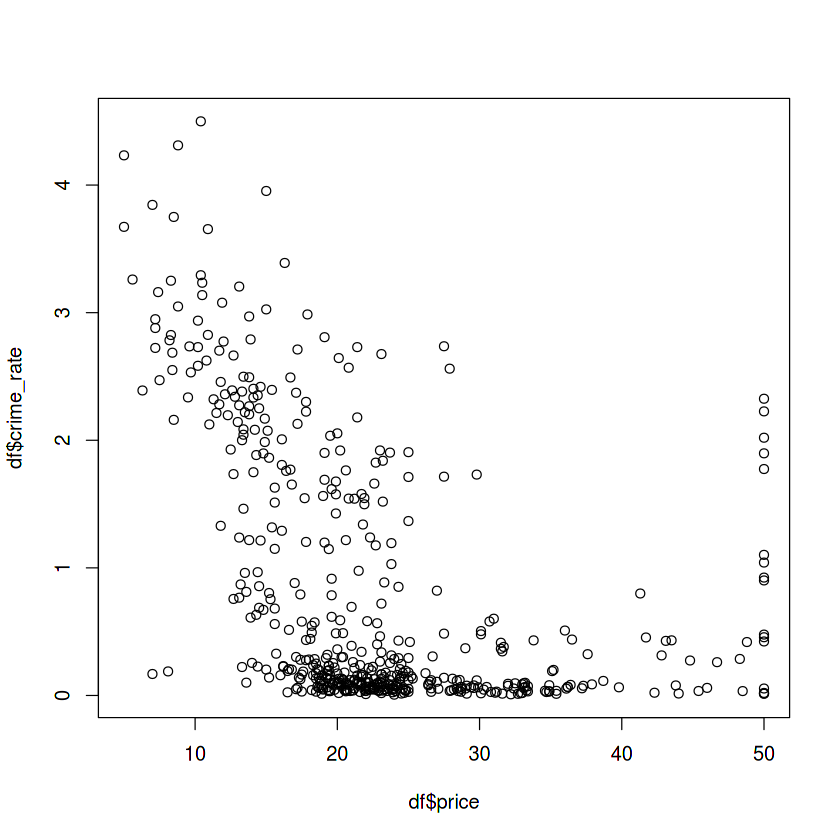

In [43]:
df$crime_rate = log(1+df$crime_rate)
plot(df$price, df$crime_rate)

In [44]:
df$avg_dist = (df$dist1 + df$dist2 + df$dist3 + df$dist4)/4
summary(df$avg_dist)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.127   2.101   3.208   3.795   5.188  12.127 

In [49]:
df <- df[,-7:-10]
df <- df[,-14]
head(df)

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,24.0,0.006300113,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.04934731,4.0875
2,21.6,0.026943735,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.04614563,4.9675
3,34.7,0.026924267,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.04576397,4.9675
4,33.4,0.031857130,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.04715060,6.0650
5,36.2,0.066770404,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.03947400,6.0625
6,28.7,0.029413161,32.18,0.458,6.430,58.7,21.3,5.21,YES,7.174,14.22960,None,53,0.04590965,6.0600
